# Tweets And Facebook Data Analysis

This notebook analysis the tweets and facebook data between platforms(altmetric.com/Plumx/Plos).

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
origin_folder = 'data/outputs/OR'

Currently we have data under OR.

## Tweets

In [3]:
df_altmetric = pd.read_csv(f'{origin_folder}/article_tweets_altmetric.csv', dtype={'tweet_id':str})
df_plumx = pd.read_csv(f'{origin_folder}/article_tweets_plumx.csv', dtype={'tweet_id':str})


In [4]:
df_altmetric = df_altmetric[df_altmetric['originalPost'] == True]


In [5]:
and_set = set(df_altmetric['tweet_id']) & set(df_plumx['tweet_id'])
len(and_set)

1273

In [6]:
a_b = set(df_altmetric['tweet_id']) - set(df_plumx['tweet_id'])
len(a_b)

644

In [7]:
b_a = set(df_plumx['tweet_id']) - set(df_altmetric['tweet_id'])
len(b_a)

83

So in 1282 tweets got by altmetric.com and 1356 tweets got by Plumx in region OR, 832 tweets showed at both sets, 450 are exclusive in altmetric.com and 524 in Plumx.

In [8]:
def ref_clip(x):
    x = str(x).replace('http://www.', '')
    x = str(x).replace('https://www.', '')
    x = str(x).replace('http://', '')
    x = str(x).replace('https://', '')
    return x
df_plumx['ref'] = df_plumx['ref'].apply(lambda x: ref_clip(x))

In [9]:
def ref_domain(x):
    return str(x).split('/')[0]
df_plumx['ref_domain'] = df_plumx['ref'].apply(lambda x: ref_domain(x))
df_plumx

,doi,ref,tweet_id,tweet_url,ref_domain
0,10.1007/s10479-015-1951-0,link.springer.com/article/10.1007/s10479-015-1...,742281562541199360,http://twitter.com/Stephane1984/statuses/74228...,link.springer.com
1,10.1007/s10479-013-1434-0,link.springer.com/article/10.1007/s10479-013-1...,1109180109301403648,http://twitter.com/dtsiot/statuses/11091801093...,link.springer.com
2,10.1007/s10479-014-1692-5,link.springer.com/article/10.1007/s10479-014-1...,568026918181867520,https://twitter.com/Supernetworks/status/56802...,link.springer.com
3,10.1007/s10479-014-1692-5,link.springer.com/article/10.1007/s10479-014-1...,499525668259246080,https://twitter.com/Supernetworks/status/49952...,link.springer.com
4,10.1080/0305215X.2014.958733,tandfonline.com/doi/full/10.1080/0305215x.2014...,517470819694702593,https://twitter.com/Kanazaki_M/status/51747081...,tandfonline.com
5,10.1080/0305215X.2014.958733,tandfonline.com/doi/abs/10.1080/0305215X.2014....,517470375119433729,http://twitter.com/Kanazaki_M/statuses/5174703...,tandfonline.com
6,10.1016/j.ejor.2015.05.053,sciencedirect.com/science/article/pii/s0377221...,790499239776423936,http://twitter.com/emelaktas/statuses/79049923...,sciencedirect.com
7,10.1016/j.ejor.2015.05.053,sciencedirect.com/science/article/pii/s0377221...,637509418746187780,http://twitter.com/cristobal_marco/statuses/63...,sciencedirect.com
8,10.1016/j.ejor.2015.06.024,sciencedirect.com/science/article/pii/S0377221...,651360147940450304,http://twitter.com/NU_Business/statuses/651360...,sciencedirect.com
9,10.1016/j.ejor.2015.05.062,sciencedirect.com/science/article/pii/S0377221...,635107188021792770,http://twitter.com/ORMS_Elsevier/statuses/6351...,sciencedirect.com


In [10]:
df_plumx['ref_domain'].nunique()

21

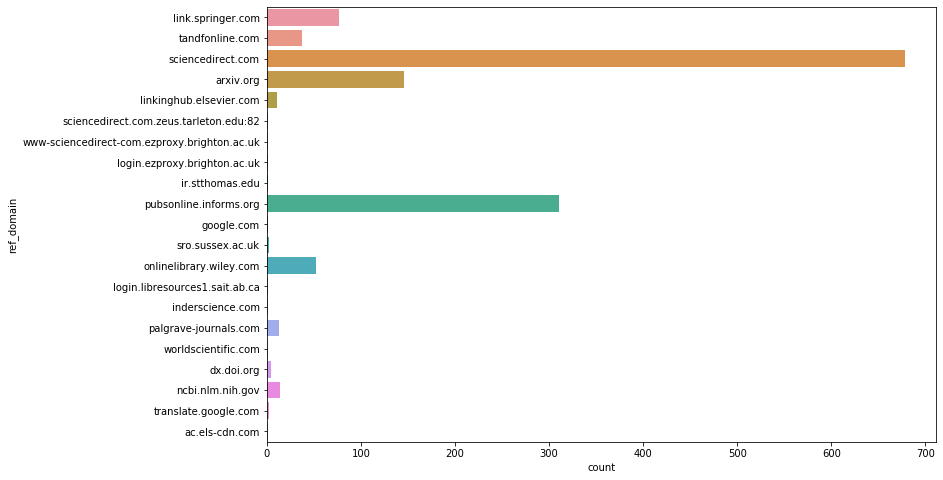

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(y='ref_domain', data=df_plumx)


In [12]:
df_plumx['ref_domain'].value_counts()

sciencedirect.com                               678
pubsonline.informs.org                          311
arxiv.org                                       146
link.springer.com                                77
onlinelibrary.wiley.com                          52
tandfonline.com                                  37
ncbi.nlm.nih.gov                                 14
palgrave-journals.com                            13
linkinghub.elsevier.com                          11
dx.doi.org                                        4
translate.google.com                              2
sro.sussex.ac.uk                                  2
sciencedirect.com.zeus.tarleton.edu:82            1
ir.stthomas.edu                                   1
ac.els-cdn.com                                    1
login.libresources1.sait.ab.ca                    1
login.ezproxy.brighton.ac.uk                      1
inderscience.com                                  1
google.com                                        1
worldscienti

In [13]:
df_plumx['alt_has'] = df_plumx['tweet_id'].apply(lambda x: x in and_set)
df_plumx_and_alt = df_plumx[df_plumx['alt_has']]

In [14]:
df_plumx_and_alt['ref_domain'].value_counts()

sciencedirect.com                               633
pubsonline.informs.org                          300
arxiv.org                                       135
link.springer.com                                76
onlinelibrary.wiley.com                          50
tandfonline.com                                  36
ncbi.nlm.nih.gov                                 14
palgrave-journals.com                            13
linkinghub.elsevier.com                          11
dx.doi.org                                        2
www-sciencedirect-com.ezproxy.brighton.ac.uk      1
login.ezproxy.brighton.ac.uk                      1
ac.els-cdn.com                                    1
Name: ref_domain, dtype: int64

In [15]:
df_plumx[df_plumx['alt_has'] == True].to_csv(f'{origin_folder}/plumx_tweets_with_alt.csv', index=False)

In [16]:
df_plumx[df_plumx['alt_has'] == False].to_csv(f'{origin_folder}/plumx_tweets_with_alt_exclude.csv', index=False)

In [23]:
df_altmetric['has_plumx'] = df_altmetric['tweet_id'].apply(lambda x: x in and_set)

In [24]:
df_altmetric[df_altmetric['has_plumx'] == False].to_csv(f'{origin_folder}/alt_tweets_with_plumx_exclude.csv', index=False)